In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


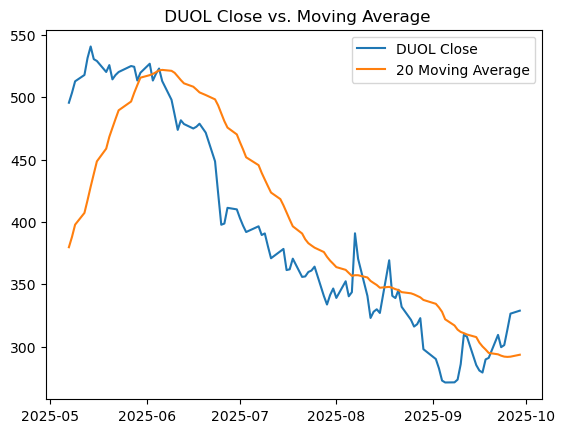

In [4]:
TICKER = 'DUOL'
WINDOW = 20
df = yf.download(TICKER)
df['MA'] = df['Close'].rolling(WINDOW).mean()
df = df.iloc[-100:, :]
plt.plot(df['Close'])
plt.plot(df['MA'])
plt.title(f' {TICKER} Close vs. Moving Average')
plt.legend([f'{TICKER} Close', f'{WINDOW} Moving Average' ])


Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
2025-05-07,495.559998,504.500000,491.059998,491.309998,1054100,379.665001,NaN,NaN,NaN
2025-05-08,503.570007,509.005005,492.750000,505.070007,744600,387.973502,1.0,0.016164,0.016164
2025-05-09,512.750000,513.869995,500.260010,505.000000,604300,397.764001,1.0,0.034688,0.034688
2025-05-12,517.830017,533.257019,503.000000,532.719971,949400,407.188002,1.0,0.044939,0.044939
2025-05-13,531.460022,536.870972,514.804993,519.359985,823900,417.427502,1.0,0.072443,0.072443
...,...,...,...,...,...,...,...,...,...
2025-09-23,299.500000,305.484985,293.500000,305.459991,1454300,292.665749,1.0,-0.395633,-0.134430
2025-09-24,301.170013,304.237000,293.829987,302.059998,1348300,291.923250,1.0,-0.392263,-0.129603
2025-09-25,313.489990,315.204987,294.450012,295.579987,1655300,291.701250,1.0,-0.367403,-0.093998


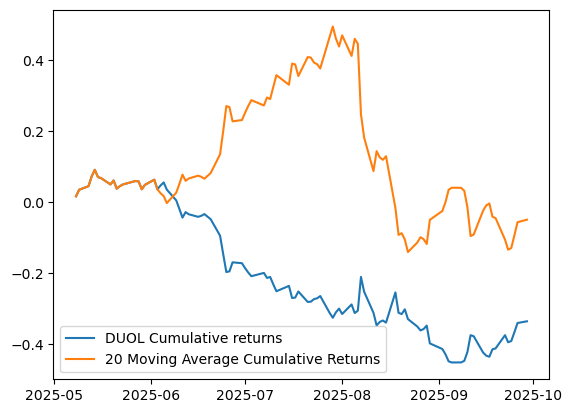

In [5]:
df.columns = df.columns.get_level_values(0)
def add_ma_strategy(df):
    df['Strategy'] =np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

df = add_ma_strategy(df)
df['asset_cumulative'] = np.cumprod(1+df['Close'].pct_change())-1
df['strategy_cumulative'] = np.cumprod(1+df['Close'].pct_change()*df['Strategy'])-1
plt.plot(df['asset_cumulative'])
plt.plot(df['strategy_cumulative'])
plt.legend([f'{TICKER} Cumulative returns', f'{WINDOW} Moving Average Cumulative Returns' ])
df

[*********************100%***********************]  1 of 1 completed

-0.9902210079325007


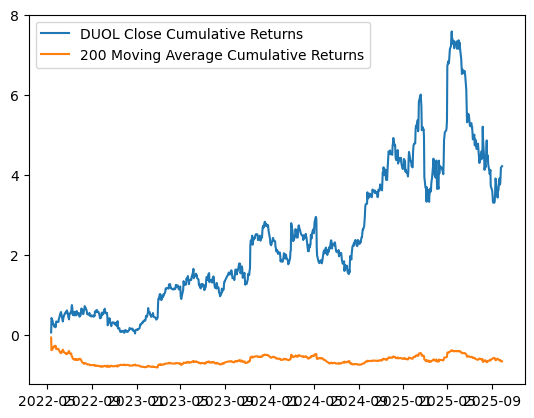

In [24]:
TICKER = 'DUOL'
WINDOW = 200

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()
    
def add_strategy(df):
    df.columns = df.columns.get_level_values(0)
    df['Strategy'] = np.where(df['Close']>df['MA'],1,-1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df
def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1+df['Close'].pct_change())-1
    df['strategy_cumulative'] = np.cumprod(1+df['Close'].pct_change()*df['Strategy'])-1
    strategy_returns = df['Close'].pct_change() * df['strategy_cumulative']
    sharpe_ratio = (strategy_returns.mean() / strategy_returns.std()) * np.sqrt(252)
    print(sharpe_ratio)
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Close Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns' ])
def main ():
    df= get_data()
    df=add_strategy(df)
    df = test_strategy(df)
    return df

main ()
